<a href="https://colab.research.google.com/github/joshimohitm9/Feature-Engineering/blob/main/Replace_Null_Values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Null Values Detection**

In [1]:
# importing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# csv file reading
df=pd.read_csv("/content/drive/MyDrive/house-prices-advanced-regression-techniques/train.csv")

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# detail about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.shape

(1460, 81)

In [6]:
# finding null values and sorting in ascending order
df_null=df.isnull().sum().sort_values(ascending=False).head(20)
df_null


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Id                 0
dtype: int64

<Axes: >

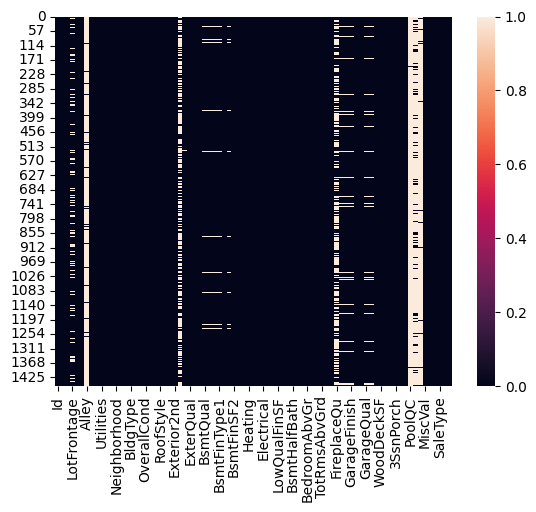

In [7]:
# heatmap will help us to detect the null values inn the data
sns.heatmap(df.isnull())

In [8]:
# percentage of null values
null_per_df=(df_null/df.shape[0])*100
null_per_df

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
Electrical       0.068493
Id               0.000000
dtype: float64

In [9]:
# droping values
df.drop(null_per_df[null_per_df>17].keys(),axis=1,inplace=True)

<Axes: >

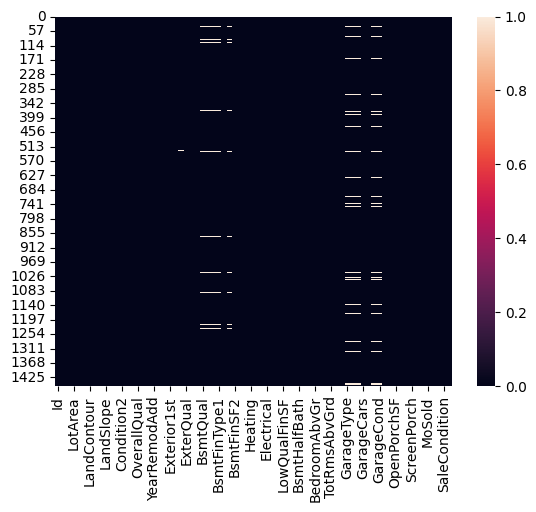

In [10]:
sns.heatmap(df.isnull())

In [11]:
df.shape

(1460, 74)

In [12]:
# selcting columns with datatype as int and float
df_integer=df.select_dtypes(include=["int64","float64"])
df_integer.columns.value_counts().sum()

37

<Axes: >

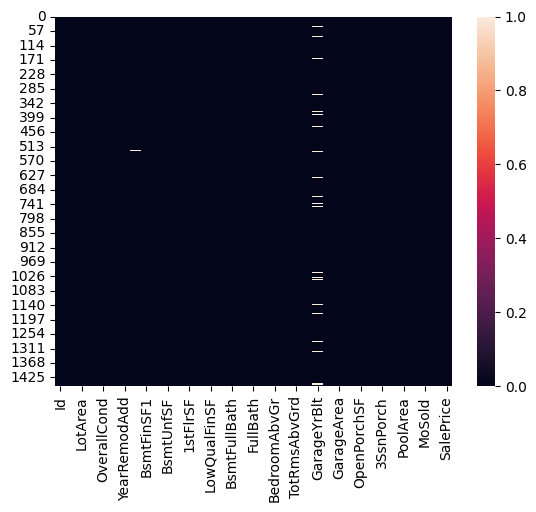

In [13]:
sns.heatmap(df_integer.isnull())

In [14]:
df_null_int=df_integer.isnull().sum().sort_values(ascending=False).head()
df_null_int

GarageYrBlt     81
MasVnrArea       8
Id               0
OpenPorchSF      0
KitchenAbvGr     0
dtype: int64

In [15]:
df_null_int=df_null_int[df_null_int>0].keys()
df_null_int

Index(['GarageYrBlt', 'MasVnrArea'], dtype='object')

In [16]:
# filling null values with mean value
for val in df_null_int:
  df_integer[val].fillna(df_integer[val].mean(),inplace=True)

In [17]:
df_integer["MasVnrArea"].isnull().sum()

0

In [18]:
df_integer.isnull().sum().sort_values(ascending=False).head()

Id              0
HalfBath        0
KitchenAbvGr    0
TotRmsAbvGrd    0
Fireplaces      0
dtype: int64

<Axes: >

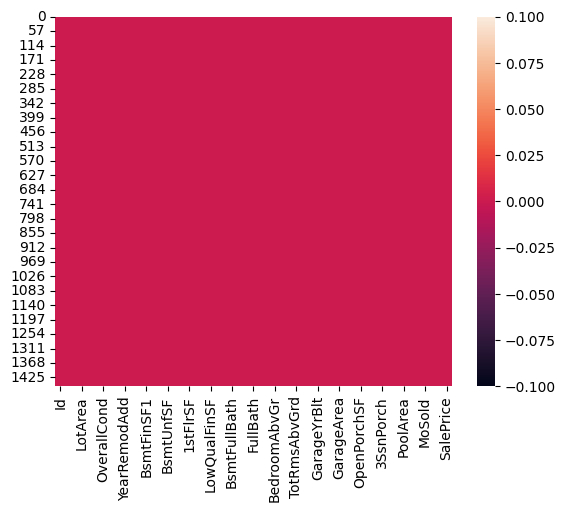

In [19]:
sns.heatmap(df_integer.isnull())

In [20]:
# clearing the null value from object datatype
df_object=df.select_dtypes(include=["object"])

In [21]:
df_object.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

<Axes: >

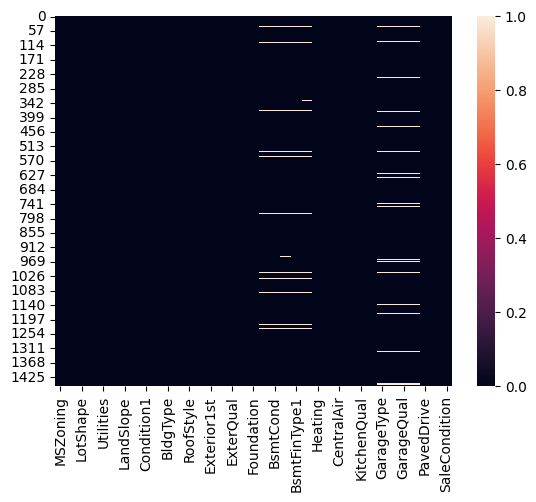

In [22]:
sns.heatmap(df_object.isnull())

In [23]:
df_obj_null=df_object.isnull().sum().sort_values(ascending=False).head(15)
df_obj_null

GarageCond      81
GarageQual      81
GarageFinish    81
GarageType      81
BsmtExposure    38
BsmtFinType2    38
BsmtCond        37
BsmtFinType1    37
BsmtQual        37
Electrical       1
HeatingQC        0
Heating          0
MSZoning         0
CentralAir       0
Functional       0
dtype: int64

In [24]:
df_obj_null=df_obj_null[df_obj_null >0].keys()
df_obj_null

Index(['GarageCond', 'GarageQual', 'GarageFinish', 'GarageType',
       'BsmtExposure', 'BsmtFinType2', 'BsmtCond', 'BsmtFinType1', 'BsmtQual',
       'Electrical'],
      dtype='object')

In [25]:
# replacing it with mode value
for val in df_obj_null:
  df_object[val].fillna(df_object[val].mode()[0],inplace=True)

In [26]:
df_object.isnull().sum().sort_values(ascending=False).head(15)

MSZoning        0
BsmtQual        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Heating         0
HeatingQC       0
CentralAir      0
Electrical      0
KitchenQual     0
Functional      0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

<Axes: >

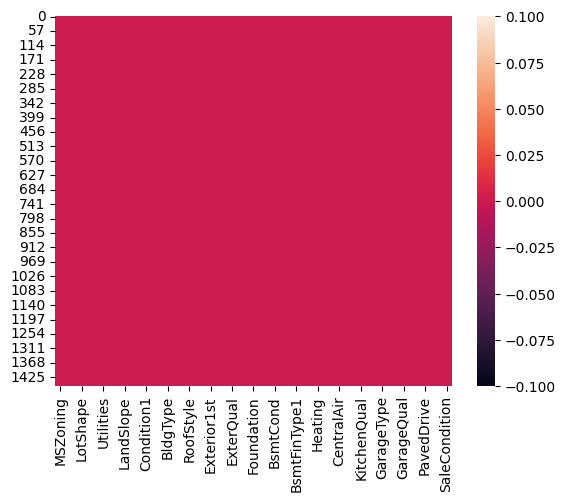

In [27]:
sns.heatmap(df_object.isnull())

In [28]:
# updating the df
df.update(df_integer)
df.update(df_object)

In [29]:
print(df.isnull().sum().sum()," is the total null values ")

0  is the total null values 


<Axes: >

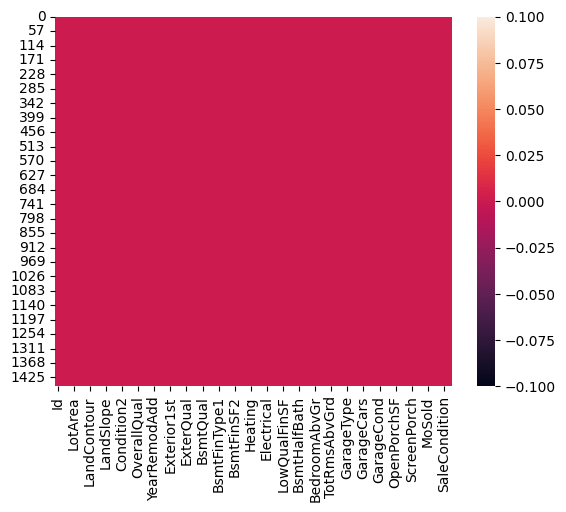

In [30]:
sns.heatmap(df.isnull())